In [22]:
import pandas as pd

from sklearn import tree
from sklearn import model_selection

from graphviz import Source
from IPython.display import display, SVG

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic_df.isnull().sum() # кол-во null полей

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
X = titanic_df.drop(labels=['PassengerId', 'Survived', 'Name', 'Cabin'], axis=1)
y = titanic_df.Survived

In [17]:
X = pd.get_dummies(X)
X.fillna({'Age': X.Age.median()}, inplace=True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

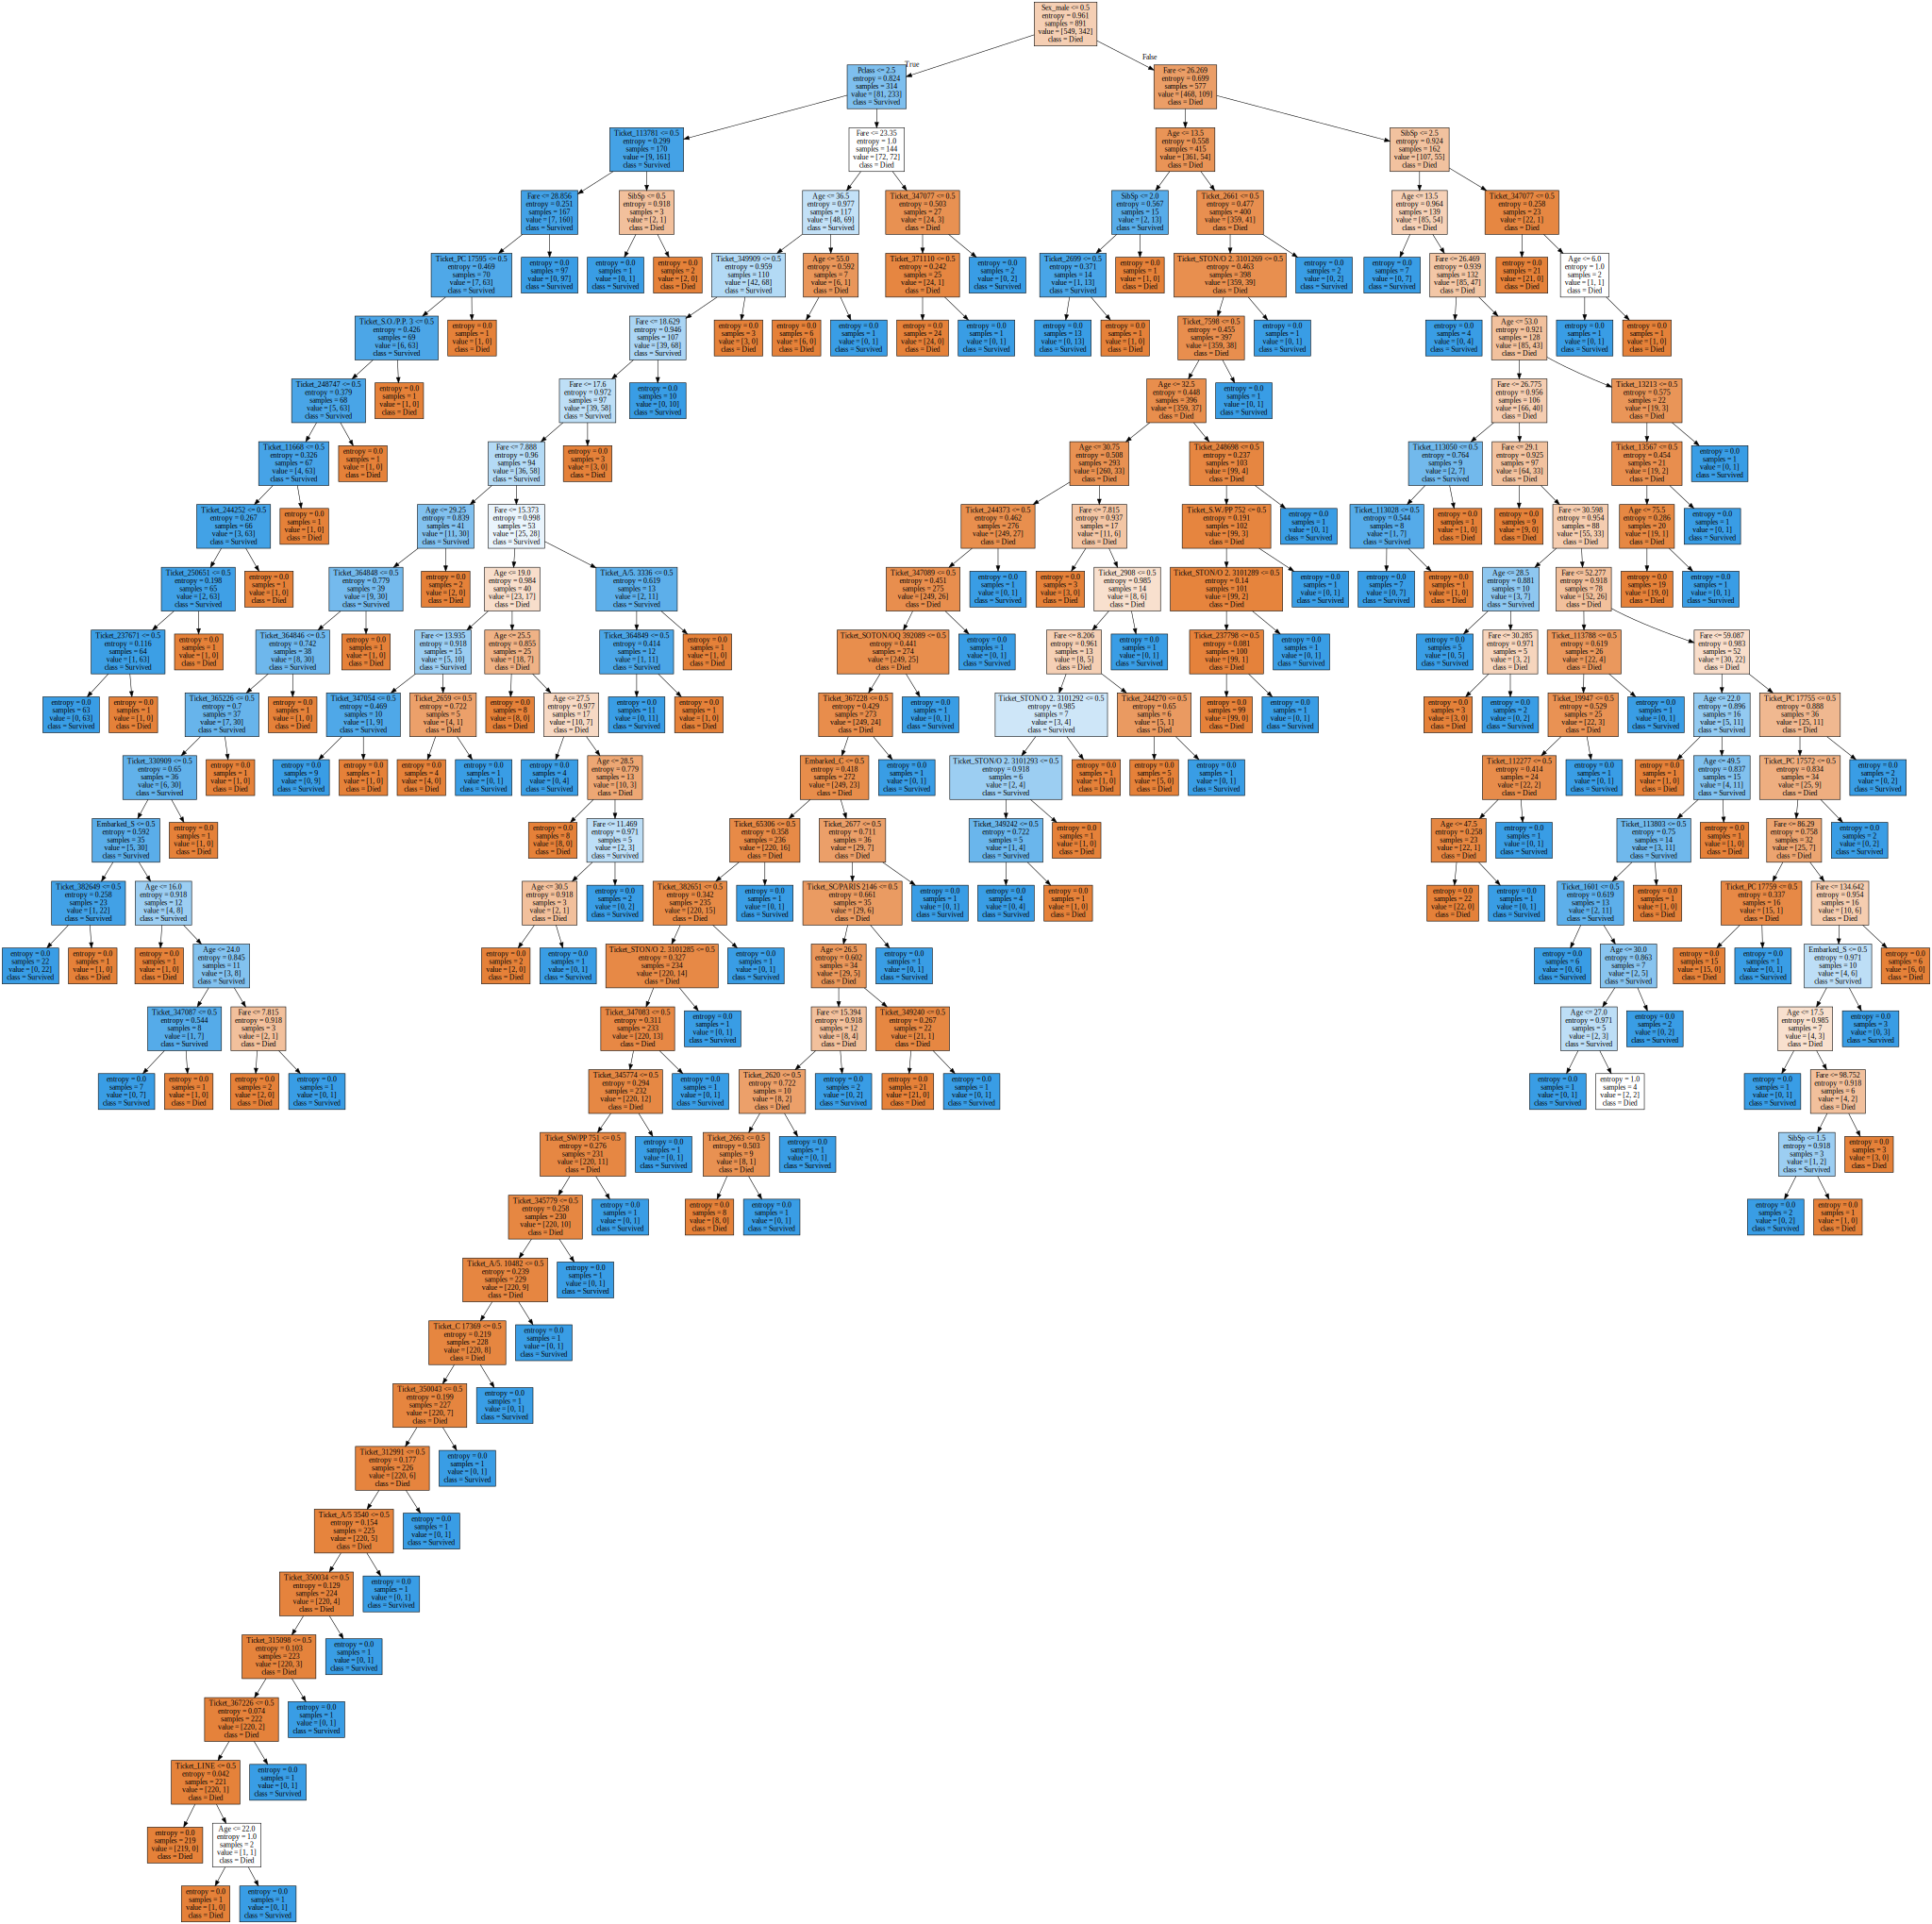

In [21]:
graph = Source(
    tree.export_graphviz(
        clf,
        out_file=None,
        feature_names=list(X),
        class_names=['Died', 'Survived'],
        filled=True
    )
)

display(SVG(graph.pipe(format='svg')))

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.33, random_state=42)

In [24]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7796610169491526

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8169491525423729